### Using kaggle API for dataset access

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:09<00:00, 65.6MB/s]
100% 1.06G/1.06G [00:09<00:00, 115MB/s] 


In [5]:
!unzip /content/dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

### Importing libraries

In [41]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from PIL import Image
from keras.models import Sequential
import cv2

In [19]:
cv2.imread('/content/dogs_vs_cats/train/cats/cat.1.jpg').shape

(280, 300, 3)

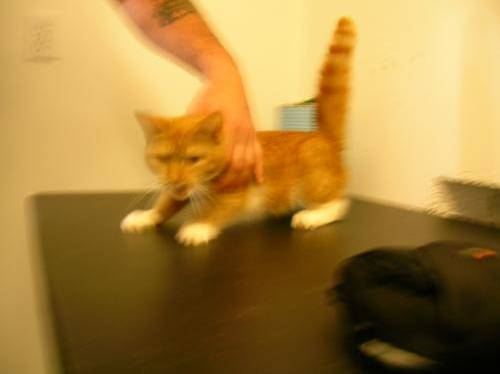

In [16]:
Image.open('/content/dogs_vs_cats/train/cats/cat.0.jpg')

### Dataset generator 

In [35]:
train_dataset = keras.utils.image_dataset_from_directory(
    '/content/dogs_vs_cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size = (256,256),
)

validation_dataset = keras.utils.image_dataset_from_directory(
    '/content/dogs_vs_cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


#### Classes in the generator

In [36]:
train_dataset.class_names

['cats', 'dogs']

In [37]:
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

In [39]:
train_ds = train_dataset.map(process)
valid_ds = validation_dataset.map(process)

### Defining model's architecture

In [43]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape = (256,256,3)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 126, 126, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 492032)           

In [44]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics='accuracy')

In [ ]:
history = model.fit(train_ds,validation_data=valid_ds,epochs=20)

Epoch 1/20


In [ ]:
history.history

In [ ]:
history.history['loss']

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

#### From graphs we can see that model is overfitting